In [1]:

import pandas as pd
import numpy as np
import lr_model as lr
import model_utils as utils
import matplotlib.pyplot as plt
import time
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

NUM_FEATURES = 1000
NUM_ITERATIONS = 500
NUM_TRAINING_EXAMPLES = 200
LEARNING_RATE = 0.1

In [2]:
#load the data, tuples
my_data_similar_df = pd.read_csv("data/my_data_similar.csv") 
print(len( my_data_similar_df))

#Grab the lyrics and the corresponding similar song title
#song_artist = my_data_similar_df['title'].astype(str) + ", " +my_data_similar_df['artist'].astype(str)
similar_lyrics, song_title = my_data_similar_df["lyrics"].tolist(), my_data_similar_df['title'].tolist()


7047


In [3]:
#Process lyrics, lemmatize and remove stop words
processed_lyrics = []
for lyric in similar_lyrics:
    processed_lyrics.append(utils.preprocess_sentence(lyric))

In [4]:
# Vectorize the data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=NUM_FEATURES)
tfidf_matrix = tfidf_vectorizer.fit_transform(processed_lyrics)

#add in numeric features?
#lyric_tfidf = tfidf_vectorizer.fit_transform(lyrics)
#X = hstack([lyric_tfidf, numerical_features_sparse])

tfidf_matrix = tfidf_matrix.toarray()


In [5]:
# Scale the features using StandardScaler - Maybe not needed
scaler = StandardScaler()
X_scaled = scaler.fit_transform(tfidf_matrix)


In [6]:
X_train, X_test, y_train, y_test = [], [], [], []


In [8]:
#Split training and testing data

for i in range(0, len(similar_lyrics), 10):  
    X_train_chunk = X_scaled[i:i+8]  # Select 8 samples for training
    X_test_chunk = X_scaled[i+8:i+10]  # Select 2 sample for testing
    y_train_chunk = song_title[i:i+8]  # Corresponding labels for training
    y_test_chunk = song_title[i+8:i+10]  # Corresponding label for testing
    
    # Append chunks to total lists
    X_train.append(X_train_chunk)
    X_test.append(X_test_chunk)
    y_train.append(y_train_chunk)
    y_test.append(y_test_chunk)

X_train = np.vstack(X_train)
X_test = np.vstack(X_test)
y_train = np.hstack(y_train)
y_test = np.hstack(y_test)


In [9]:
print("Training set size:", X_train[:5])
print("labels for training set:", y_train[:5])
print("Testing set size:", X_test[:5])
print("labels for training set:", y_test[:5])


Training set size: [[-0.07494321 -0.09367645 -0.11311231 ... -0.06663206 -0.11013878
  -0.16355722]
 [-0.07494321 -0.09367645 -0.11311231 ... -0.06663206 -0.11013878
  -0.16355722]
 [-0.07494321 -0.09367645 -0.11311231 ... -0.06663206 -0.11013878
  -0.16355722]
 [-0.07494321  0.90335975 -0.11311231 ... -0.06663206 -0.11013878
  -0.16355722]
 [-0.07494321 -0.09367645 -0.11311231 ... -0.06663206 -0.11013878
  -0.16355722]]
labels for training set: ['Cuéntale' 'Cuéntale' 'Cuéntale' 'Cuéntale' 'Cuéntale']
Testing set size: [[-0.07494321 -0.09367645 -0.11311231 ... -0.06663206 -0.11013878
  -0.16355722]
 [-0.07494321 -0.09367645 -0.11311231 ... -0.06663206 -0.11013878
  -0.16355722]
 [-0.07494321 -0.09367645 -0.11311231 ... -0.06663206 -0.11013878
  -0.16355722]
 [-0.07494321  2.18307018 -0.11311231 ... -0.06663206 -0.11013878
  -0.16355722]
 [-0.07494321 -0.09367645 -0.11311231 ... -0.06663206 -0.11013878
  -0.16355722]]
labels for training set: ['Libertad' 'Libertad' 'Te He Querido, Te He

In [10]:
#Get shape and sparsity
print(tfidf_matrix.shape)
print(np.count_nonzero(tfidf_matrix[0])/len(tfidf_matrix[0])*100)

(7047, 1000)
5.7


In [11]:
#Use Logistic Regression from Homework
regression_model = lr.LogisticRegression(LEARNING_RATE,NUM_ITERATIONS)
print(f"x shape: {X_train.shape}")
start_time = time.time()
regression_model.train(X_train, y_train, True)
end_time = time.time()

print(f"time: {end_time - start_time}")

x shape: (5639, 1000)
Training for 500 iterations
class mappings:  {'001': 0, '085 - Ao Vivo': 1, '1000 Oceans': 2, '11 PM': 3, '1st of Tha Month': 4, '23rd Street': 5, '3 Nights': 6, '3005': 7, '4Me 4Me': 8, '5 Letras': 9, "5 MO' MINUTES": 10, '505': 11, '777-666': 12, '8TEEN': 13, 'A Mí': 14, 'A Song For Mama': 15, 'A Ti No': 16, 'A Tu Merced': 17, 'ABALO EMOCIONAL - Ao Vivo': 18, 'ADMV': 19, 'ALIEN SUPERSTAR': 20, 'AMERIICAN REQUIEM': 21, 'Abusadora': 22, 'Across The Universe - Remastered 2009': 23, 'Add Up My Love': 24, 'Addicted': 25, 'Afraid': 26, 'After Hours': 27, "Age Ain't Nothing But a Number": 28, 'Agosto': 29, 'Ahora Es': 30, "Ain't No Rest For The Wicked - Original Version": 31, 'All My Life': 32, 'All Night': 33, 'Alocate': 34, 'Amarillo': 35, 'Ambitionz Az A Ridah': 36, 'American Idiot': 37, 'Amor Prohibido': 38, 'Angel in Disguise': 39, 'Angelina': 40, 'Angelito': 41, 'Another One Bites The Dust - Remastered 2011': 42, 'Another Way to Die': 43, 'Apocalypse': 44, 'Aqui 

In [12]:
#Test predicting funtion
print(X_test[0])
output = regression_model.predict(X_test[0])
print(output)
print(y_test[0])


[-7.49432123e-02 -9.36764463e-02 -1.13112314e-01 -9.51628276e-02
 -9.30798743e-02 -1.07522473e-01  7.48587688e-01 -1.19536088e-01
 -1.06680755e-01 -6.51021954e-02 -6.04067810e-02  1.71018261e+00
 -1.44916719e-01 -2.91411241e-01 -1.21407410e-01 -1.74167069e-01
  2.24664186e+00 -1.85280988e-01 -8.53521167e-02 -6.61900240e-02
 -1.68842366e-01  2.06692780e+00 -9.49086270e-02 -1.08131793e-01
 -1.92566784e-01 -1.12474499e-01 -1.12570924e-01 -1.45730605e-01
 -2.14498831e-01 -1.07115759e-01 -1.12708088e-01 -1.41548859e-01
 -1.33443551e-01  4.16795721e+00  3.84986567e+00 -1.50081384e-01
 -1.85463153e-01 -1.42353444e-01 -1.41390647e-01 -1.14707846e-01
 -2.29508834e-01 -7.52381295e-02 -1.17038456e-01 -2.46995334e-01
 -1.44731714e-01 -1.30475319e-01  6.19347943e-01  2.45414967e+00
 -2.33022426e-01  1.71887666e+00 -1.04757079e-01 -1.09122312e-01
 -1.18290357e-01 -1.32317525e-01 -4.42329662e-01 -3.03284351e-01
 -1.82105035e-01 -1.35061703e-01 -1.47938250e-01 -1.24507316e-01
 -1.09301510e-01 -1.13937

In [13]:
y_pred =[]

for test_plot in X_test:
  y_pred.append(regression_model.predict(test_plot))

print(f"Predicted Song Titles: {y_pred[:10]}")
print(f"Actual Song Titles: {y_test[:10]}")


a_score = accuracy_score(y_test, y_pred)
p_score = precision_score(y_test, y_pred, average='weighted')
r_score = recall_score(y_test, y_pred, average='weighted')
f_score = f1_score(y_test, y_pred, average='weighted')
#ocab_size = classifier.get_vocab_size()
print(f"accuracy score = {a_score}")
print(f"precision score = {p_score}")
print(f"recall score = {r_score}")
print(f"f1 score = {f_score}")


Predicted Song Titles: ['Libertad', 'Libertad', 'Te He Querido, Te He Llorado', 'Felina', 'Dile', 'Pepas', 'Baila Morena - Live', 'Pegao', 'Quiero Saber', "Llamé Pa' Verte (Bailando Sexy)"]
Actual Song Titles: ['Libertad' 'Libertad' 'Te He Querido, Te He Llorado'
 'Te He Querido, Te He Llorado' 'Quiero Bailar' 'Quiero Bailar'
 'Quiero Saber' 'Quiero Saber' 'Pegao' 'Pegao']
accuracy score = 0.18323863636363635
precision score = 0.13743736702729323
recall score = 0.18323863636363635
f1 score = 0.147086655660455


/Users/0wner/Documents/Northeastern/Academic/S25/NLP/HW4/.conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/0wner/Documents/Northeastern/Academic/S25/NLP/HW4/.conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [14]:
print(f"Predicted Song Titles: {y_pred[:10]}")
print(f"Actual Song Titles: {y_test[:10]}")


Predicted Song Titles: ['Libertad', 'Libertad', 'Te He Querido, Te He Llorado', 'Felina', 'Dile', 'Pepas', 'Baila Morena - Live', 'Pegao', 'Quiero Saber', "Llamé Pa' Verte (Bailando Sexy)"]
Actual Song Titles: ['Libertad' 'Libertad' 'Te He Querido, Te He Llorado'
 'Te He Querido, Te He Llorado' 'Quiero Bailar' 'Quiero Bailar'
 'Quiero Saber' 'Quiero Saber' 'Pegao' 'Pegao']


### Evaluating Model

Use a confusion matrix:
- ##### predicts the correct song title
- ##### mistakes one class for another


Counter({'Tití Me Preguntó': 12, 'Propuesta Indecente': 10, 'Gasolina': 10, 'Yo Voy (feat. Daddy Yankee)': 8, 'Yonaguni': 8, 'Moscow Mule': 8, 'Me Rehúso': 8, 'Hasta el Amanecer': 8, 'NI BIEN NI MAL': 8, 'El Amante': 8, 'Rakata': 6, 'Candy': 6, 'Sola': 6, 'Softly': 6, 'THE LONELIEST': 6, 'Amor Prohibido': 6, 'Ferxxo 100': 6, 'Yo Perreo Sola': 6, 'I Know You Want Me (Calle Ocho)': 6, 'Hotel Room Service': 6, 'Pepas': 6, 'Title and Registration': 6, 'El Préstamo': 6, 'Gris': 6, 'La player (Bandolera)': 6, 'Bobo': 6, 'El Perdedor': 6, "That's What I Like": 6, 'Travesuras': 5, 'Libertad': 4, 'Te He Querido, Te He Llorado': 4, 'Quiero Bailar': 4, 'Quiero Saber': 4, 'Pegao': 4, 'Si': 4, 'Salió El Sol': 4, 'Dile': 4, "Pa' Que Retozen": 4, 'Promiscuous': 4, 'Borro Cassette': 4, 'Corazón Sin Cara': 4, 'Ella Me Levanto': 4, 'Instagram': 4, 'VACAXIONES': 4, 'GYALIS': 4, 'Red Nose': 4, 'Ser Bichote': 4, 'SOS': 4, 'Temperature': 4, 'Starships': 4, 'Juna': 4, 'HP': 4, '11 PM': 4, 'Morado': 4, 'Hones

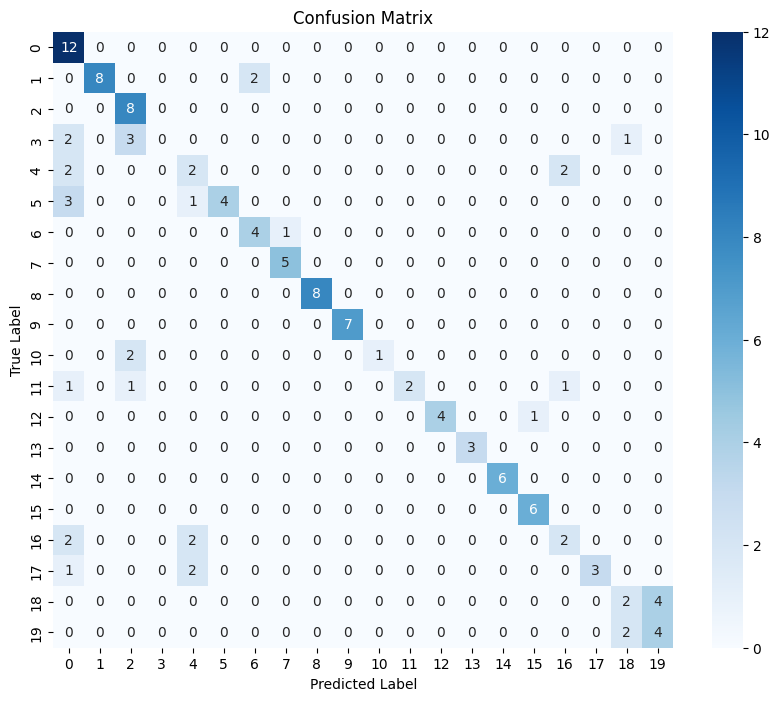

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from collections import Counter

label_counts = Counter(y_test)
print(label_counts)
label_counts = Counter(y_test)
print(label_counts)
labels = sorted(list(set(y_test)))
top_labels = [label for label, _ in label_counts.most_common(20)]  # adjust number as needed
for item in top_labels:
    print(f"{item}\n")

cm = confusion_matrix(y_test, y_pred, labels=top_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [16]:
plt.savefig('plots/confusion_matrix_song+artist.png') 

<Figure size 640x480 with 0 Axes>

In [17]:
print(len(set(y_test)))

591


#### Use an example song
Example song: Salio El Sol by Don Omar
Song Index: 301
Similar Song


In [18]:
#X = similar_song_Lyrics
#similar_song_title - Song Title

#Datapoint [0]
print(f"Original input song it should map too: {my_data_similar_df["title"][301]} by {my_data_similar_df["artist"][301]}")
print(f"Similar song we passed into model: {my_data_similar_df["similar_track"][301]}  by {my_data_similar_df["similar_artist"][301]}")
print(f"The similar songs Lyrics: {my_data_similar_df["lyrics"][301][0:500]}")


Original input song it should map too: Dile by Don Omar
Similar song we passed into model: Salió el Sol  by Don Omar
The similar songs Lyrics: 18 ContributorsSalió El Sol Lyrics[Letra de "Salió El Sol"]

[Intro]
Platinium Studio
Respect
¡Don, Don, Don, Don, Don!

[Coro]
Salió el sol (Don, Don!)
Cuerpo bronceado y sus amigas buscaban acción (All the sexy—)
La canción (All my sexy ladies!)
Que causa en ellas y sus cuerpos esa sensación (More reggaeton!)
Reggaeton
Piden reggaeton
Del de Don
(Pon de river, pon de river, pon de river)
Sientan la presión (Pon de bank, pon de bank, pon de bank)
(Pon de bank, pon de bank)

[Verso 1]
Y la baila


In [19]:
for key,val in regression_model.label_mapping.items():
    if key == "Dile, Don Omar":
        print(f"{key}: {val}")

In [20]:
for key,val in regression_model.label_mapping.items():
    if key == "Guatauba, Plan B":
        print(f"{key}: {val}")

In [21]:
#Labels that are not similar to: Salio el Sol by Don Omar
# 6 - 3 nights by Dominic Fike
# 11 - 505 by Arctic Monkeys
# 13 - 8TEEN by Khalid
# 21 - American Requiem by Beyonce


#Lbaels somewhat similar to : Salio el Sol by Don Omar
# 17 - A Tu Merced, Bad Bunny
# 19 - ADMV by Maluma
#241 - Hasta el amanecer by Niki Jam

In [22]:
x = X_train[301]  # example TF-IDF row
X = np.append(x,1)
dot_product = np.dot(X, regression_model.weights.T)
z_score = np.reshape(dot_product, (1, -1))
prediction = regression_model._softmax(z_score)
flatten_predictions = prediction.flatten()


In [24]:
# import matplotlib.pyplot as plt
# correct = y_pred == y_test

# max_probs = np.max(prediction, axis=1)

# plt.hist(max_probs[correct], bins=20, alpha=0.7, label='Correct')
# plt.hist(max_probs[~correct], bins=20, alpha=0.7, label='Incorrect')
# plt.xlabel("Model Confidence (Max Probability)")
# plt.ylabel("Number of Samples")
# plt.legend()
# plt.title("Prediction Confidence Distribution")
# plt.show()

In [25]:
potential_indices = [6,17,19,241,11,13,21, 233, 154]


for index in potential_indices:
        for key,val in regression_model.label_mapping.items():
                if val == index:
                        print(f" predicted label: {key} with prob {flatten_predictions[index]} at index {index}")

 predicted label: 3 Nights with prob 4.108026540691073e-05 at index 6
 predicted label: A Tu Merced with prob 0.0007401092855075423 at index 17
 predicted label: ADMV with prob 0.0004230579954972921 at index 19
 predicted label: Hasta el Amanecer with prob 0.5574226755057222 at index 241
 predicted label: 505 with prob 7.515104457820145e-05 at index 11
 predicted label: 8TEEN with prob 5.705735946639631e-05 at index 13
 predicted label: AMERIICAN REQUIEM with prob 4.6551000625471634e-05 at index 21
 predicted label: Guatauba with prob 0.14099392292957616 at index 233
 predicted label: Dile Que Tu Me Quieres with prob 0.0008778826272595717 at index 154


In [26]:
print(f"the actual mapping {y_train[301]}")

the actual mapping Guatauba


In [27]:
X = np.append(x,1)
dot_product = np.dot(X, regression_model.weights.T)

z_score = np.reshape(dot_product, (1, -1))

        # to reshape your array into one with 1 row and n columns
        # use np.reshape(arr, (1, -1))
        # the shape of the array you give to 
        # your softmax function should be (1, n)


        # PROVIDED
        # then you can your z score array to the softmax function
prediction = regression_model._softmax(z_score)
flatten_predictions = prediction.flatten()
top_10_indices = np.argsort(flatten_predictions)[-10:][::-1]  # sort and take top 10

        # then map the prediction to a class
        #returns index of max 
#predicted_label = np.argmax(flatten_predictions, axis=1)[0]

        # TODO: students
        # translate the labels back to human readable form

for index in top_10_indices:
        for key,val in regression_model.label_mapping.items():
                if val == index:
                        print(f" predicted label: {key} with prob {flatten_predictions[index]} at index {index}")

 predicted label: Hasta el Amanecer with prob 0.5574226755057222 at index 241
 predicted label: Guatauba with prob 0.14099392292957616 at index 233
 predicted label: El Perdedor with prob 0.13704628470929497 at index 181
 predicted label: A Mí with prob 0.0054742587094274466 at index 14
 predicted label: Un Coco with prob 0.004506362152423701 at index 560
 predicted label: El Amante with prob 0.0038607778115851833 at index 178
 predicted label: Neverita with prob 0.0033979573984681244 at index 383
 predicted label: Rojo with prob 0.002656157511047566 at index 455
 predicted label: Bobo with prob 0.0024945558940976478 at index 84
 predicted label: Feliz Cumpleaños Ferxxo with prob 0.002345841136780222 at index 207


In [28]:
x = X_train[301]  # example TF-IDF row

output = regression_model.predict(x)
print(output)

Hasta el Amanecer


In [29]:
x = X_train[301]  # example TF-IDF row
x = np.append(x, 1)
dot_product = np.dot(x, regression_model.weights.T)
z_score = np.reshape(dot_product, (1, -1))
probs = regression_model._softmax(z_score)
flat_arr = probs.flatten()


In [30]:
sampled_index = np.random.choice(len(flat_arr), p=flat_arr)
print(sampled_index)
for key,val in regression_model.label_mapping.items():
        if val == sampled_index:
            print(f"The probability for {key}: was {flat_arr[index]}")


228
The probability for Going Under: was 0.002345841136780222


In [31]:
top_10_indices = np.argsort(flat_arr)[-10:][::-1]  # sort and take top 10
print(top_10_indices)

[241 233 181  14 560 178 383 455  84 207]


In [32]:
for index in top_10_indices:
    print(f"index is {index}")
    for key,val in regression_model.label_mapping.items():
        if val == index:
            print(f"The probability for {key}: was {flat_arr[index]}")


index is 241
The probability for Hasta el Amanecer: was 0.5574226755057222
index is 233
The probability for Guatauba: was 0.14099392292957616
index is 181
The probability for El Perdedor: was 0.13704628470929497
index is 14
The probability for A Mí: was 0.0054742587094274466
index is 560
The probability for Un Coco: was 0.004506362152423701
index is 178
The probability for El Amante: was 0.0038607778115851833
index is 383
The probability for Neverita: was 0.0033979573984681244
index is 455
The probability for Rojo: was 0.002656157511047566
index is 84
The probability for Bobo: was 0.0024945558940976478
index is 207
The probability for Feliz Cumpleaños Ferxxo: was 0.002345841136780222


In [33]:
x = X_train[0]  # example TF-IDF row
x = np.append(x, 1)
dot_product = np.dot(x, regression_model.weights.T)
z_score = np.reshape(dot_product, (1, -1))
probs = regression_model._softmax(z_score)
#print(probs)
index = np.max(probs)
max_index = np.argmax(probs)
print(index)
print(f"max probability : {probs[index]}")

top_10_indices = np.argsort(probs)[::-1][:10]  # sort and take top 10
print(top_10_indices)
index_to_label = {v: k for k, v in regression_model.label_mapping.items()}
top_10 = [(index_to_label[i], probs[i]) for i in top_10_indices]

for label, prob in top_10:
    print(f"{label}: {prob:.4f}")

0.7747707905570858


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices